In [1]:
"""
Nombres de las variables!

amount_tsh = carga estática total (cantidad de agua disponible, para el punto de agua).
date_recorded = fecha en la que se incluyó el registro en los datos.
funder = quién financió el pozo.
gps_height = altitud del pozo.
installer = organización que lo instaló.
longitude = coordenada GPS.
latitude = coordenada GPS.
wpt_name = nombre del punto de agua, si lo tiene.
num_private =
basin = cuenca hidrográfica.
subvillage = localización geográfica.
region = localización geográfica.
region_code = código localización geográfica.
district_code = código localización geográfica.
lga = ubicación geográfica.
ward = ubicación geográfica.
population = población alrededor del pozo.
public_meeting = True/False si es punto de reunión.
recorded_by = grupo que introdujo este registro en los datos.
scheme_management = quién opera el punto de agua.
scheme_name = quién opera el punto de agua.
permit = si el punto de agua está permitido.
construction_year = año de construcción.
extraction_type = el tipo de extracción que utiliza el punto de agua.
extraction_type_group = el tipo de extracción que utiliza el punto de agua.
extraction_type_class = el tipo de extracción que utiliza el punto de agua.
management = cómo se gestiona el pozo.
management_group = cómo se gestiona el pozo.
payment = coste del agua.
payment_type = coste del agua.
water_quality = calidad del agua.
quality_group = calidad del agua.
quantity = cantidad de agua que aporta el pozo.
quantity_group = cantidad de agua que aporta el pozo.
source = la fuente del agua.
source_type = la fuente del agua.
source_class = la fuente del agua.
waterpoint_type = el tipo de punto de agua.
waterpoint_type_group = el tipo de punto de agua.
"""

'\nNombres de las variables!\n\namount_tsh = carga estática total (cantidad de agua disponible, para el punto de agua).\ndate_recorded = fecha en la que se incluyó el registro en los datos.\nfunder = quién financió el pozo.\ngps_height = altitud del pozo.\ninstaller = organización que lo instaló.\nlongitude = coordenada GPS.\nlatitude = coordenada GPS.\nwpt_name = nombre del punto de agua, si lo tiene.\nnum_private =\nbasin = cuenca hidrográfica.\nsubvillage = localización geográfica.\nregion = localización geográfica.\nregion_code = código localización geográfica.\ndistrict_code = código localización geográfica.\nlga = ubicación geográfica.\nward = ubicación geográfica.\npopulation = población alrededor del pozo.\npublic_meeting = True/False si es punto de reunión.\nrecorded_by = grupo que introdujo este registro en los datos.\nscheme_management = quién opera el punto de agua.\nscheme_name = quién opera el punto de agua.\npermit = si el punto de agua está permitido.\nconstruction_year

### 2.1. Ejercicio 1

Dado un fichero reto_agua.csv con los datos, realizad los siguientes puntos:

• Cargad el csv

• Mostrad los primeros 5 datos


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
file=r'reto_agua.csv'

data=pd.read_csv(file,sep=',')
df=data.copy()

df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,construction_year,extraction_type,management_group,payment_type,water_quality,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,1999,gravity,user-group,annually,soft,good,enough,groundwater,communal standpipe,functional
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,2010,gravity,user-group,never pay,soft,good,insufficient,surface,communal standpipe,functional
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,2009,gravity,user-group,per bucket,soft,good,enough,surface,communal standpipe,functional
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,1986,submersible,user-group,never pay,soft,good,dry,groundwater,communal standpipe,non functional
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,0,gravity,other,never pay,soft,good,seasonal,surface,communal standpipe,functional


#### • Realizad un análisis exploratorio de la estructura y los datos

#### • Extraed la información de la estructura del dataset para responder a las siguientes preguntas:


Decidimos eliminar la variable "id" porque es un valor único para cada registro

In [4]:
df.drop(columns='id',inplace=True)

Decidimos unificar todos los valores object a minúsculas, antes de buscar duplicados y evitar categorías que pudiesen ser iguales escritas con mayúsculas o minúsculas, para ello tenemos que pasar los datos a str y antes decidimos tratar los valores nulos ya que luego no serían detectables.

In [5]:
def deteccion_nulos(df):

    null_to_drop=[]
    for i in df.columns:
        null=df[i].isnull().sum()
        if null >0:
            percentage_of_null=(null*100)/len(df)
            print(f'columna: {i}, cantidad de nulos: {null}, porcentaje de nulos: {round(percentage_of_null,2)}%')
            null_to_drop.append(i)
    return(null_to_drop)

In [6]:
nulos = deteccion_nulos(df)
nulos

columna: funder, cantidad de nulos: 3198, porcentaje de nulos: 5.81%
columna: installer, cantidad de nulos: 3215, porcentaje de nulos: 5.84%
columna: public_meeting, cantidad de nulos: 3178, porcentaje de nulos: 5.77%
columna: scheme_management, cantidad de nulos: 3654, porcentaje de nulos: 6.63%
columna: permit, cantidad de nulos: 2756, porcentaje de nulos: 5.0%


['funder', 'installer', 'public_meeting', 'scheme_management', 'permit']

Como las variables donde hay nulos son categóricas, decidimos poner una "?" a los nulos para que tomen su propia categoría:

In [7]:
def cambio_a_interrogación(df, nulos):
    for i in nulos:
        df[i] = df[i].fillna("?")
    return df

cambio_a_interrogación(df, nulos)

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,region,...,construction_year,extraction_type,management_group,payment_type,water_quality,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,...,1999,gravity,user-group,annually,soft,good,enough,groundwater,communal standpipe,functional
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,...,2010,gravity,user-group,never pay,soft,good,insufficient,surface,communal standpipe,functional
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,...,2009,gravity,user-group,per bucket,soft,good,enough,surface,communal standpipe,functional
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,...,1986,submersible,user-group,never pay,soft,good,dry,groundwater,communal standpipe,non functional
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,...,0,gravity,other,never pay,soft,good,seasonal,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55078,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kilimanjaro,...,1999,gravity,user-group,per bucket,soft,good,enough,groundwater,communal standpipe,functional
55079,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Iringa,...,1996,gravity,user-group,annually,soft,good,enough,surface,communal standpipe,functional
55080,0.0,?,0,?,34.017087,-8.750434,Mashine,0,Rufiji,Mbeya,...,0,swn 80,user-group,monthly,fluoride,fluoride,enough,groundwater,hand pump,functional
55081,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Dodoma,...,0,nira/tanira,user-group,never pay,soft,good,insufficient,groundwater,hand pump,functional


In [8]:
df.isnull().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
management_group         0
payment_type             0
water_quality            0
quality_group            0
quantity_group           0
source_class             0
waterpoint_type_group    0
status_group             0
dtype: int64

#### Transformación a minúculas

In [9]:
columnas_a_transformar = ["funder", "installer", "wpt_name", "basin", "region", "public_meeting", "recorded_by",
                          "scheme_management", "permit", "extraction_type", "management_group", "payment_type", "water_quality",
                          "quality_group", "quantity_group", "source_class", "waterpoint_type_group", "status_group"]

def minusculas(df, columnas):
    for i in columnas:
        df[i] = df[i].astype(str).str.lower()
    return df

df = minusculas(df, columnas_a_transformar)

df

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,region,...,construction_year,extraction_type,management_group,payment_type,water_quality,quality_group,quantity_group,source_class,waterpoint_type_group,status_group
0,6000.0,roman,1390,roman,34.938093,-9.856322,none,0,lake nyasa,iringa,...,1999,gravity,user-group,annually,soft,good,enough,groundwater,communal standpipe,functional
1,0.0,grumeti,1399,grumeti,34.698766,-2.147466,zahanati,0,lake victoria,mara,...,2010,gravity,user-group,never pay,soft,good,insufficient,surface,communal standpipe,functional
2,25.0,lottery club,686,world vision,37.460664,-3.821329,kwa mahundi,0,pangani,manyara,...,2009,gravity,user-group,per bucket,soft,good,enough,surface,communal standpipe,functional
3,0.0,unicef,263,unicef,38.486161,-11.155298,zahanati ya nanyumbu,0,ruvuma / southern coast,mtwara,...,1986,submersible,user-group,never pay,soft,good,dry,groundwater,communal standpipe,non functional
4,0.0,action in a,0,artisan,31.130847,-1.825359,shuleni,0,lake victoria,kagera,...,0,gravity,other,never pay,soft,good,seasonal,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55078,10.0,germany republi,1210,ces,37.169807,-3.253847,area three namba 27,0,pangani,kilimanjaro,...,1999,gravity,user-group,per bucket,soft,good,enough,groundwater,communal standpipe,functional
55079,4700.0,cefa-njombe,1212,cefa,35.249991,-9.070629,kwa yahona kuvala,0,rufiji,iringa,...,1996,gravity,user-group,annually,soft,good,enough,surface,communal standpipe,functional
55080,0.0,?,0,?,34.017087,-8.750434,mashine,0,rufiji,mbeya,...,0,swn 80,user-group,monthly,fluoride,fluoride,enough,groundwater,hand pump,functional
55081,0.0,malec,0,musa,35.861315,-6.378573,mshoro,0,rufiji,dodoma,...,0,nira/tanira,user-group,never pay,soft,good,insufficient,groundwater,hand pump,functional


#### Tratatamiento de duplicados

In [10]:
df.duplicated().sum()

166

In [11]:
df=df.drop_duplicates()

In [12]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year
count,54917.000000,54917.000000,54917.000000,5.491700e+04,54917.000000,54917.000000,54917.000000
mean,322.568328,673.315276,34.389128,-5.763399e+00,0.488665,180.802411,1314.258190
std,3070.372845,696.590111,5.892746,2.918784e+00,12.656287,474.981278,947.274097
min,0.000000,-90.000000,0.000000,-1.158630e+01,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.194534,-8.573288e+00,0.000000,0.000000,0.000000
50%,0.000000,371.000000,34.969752,-5.107188e+00,0.000000,26.000000,1987.000000
75%,20.000000,1326.000000,37.209304,-3.335832e+00,0.000000,211.000000,2004.000000
max,350000.000000,2628.000000,40.345193,-2.000000e-08,1776.000000,30500.000000,2013.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54917 entries, 0 to 55082
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             54917 non-null  float64
 1   funder                 54917 non-null  object 
 2   gps_height             54917 non-null  int64  
 3   installer              54917 non-null  object 
 4   longitude              54917 non-null  float64
 5   latitude               54917 non-null  float64
 6   wpt_name               54917 non-null  object 
 7   num_private            54917 non-null  int64  
 8   basin                  54917 non-null  object 
 9   region                 54917 non-null  object 
 10  population             54917 non-null  int64  
 11  public_meeting         54917 non-null  object 
 12  recorded_by            54917 non-null  object 
 13  scheme_management      54917 non-null  object 
 14  permit                 54917 non-null  object 
 15  co

Decidimos observar algunas de las variables categóricas para intentar entenderlas mejor

In [14]:
df.num_private.value_counts()

0       54208
6          75
1          67
5          46
32         40
        ...  
136         1
42          1
23          1
698         1
1402        1
Name: num_private, Length: 62, dtype: int64

In [15]:
df.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'region', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'management_group',
       'payment_type', 'water_quality', 'quality_group', 'quantity_group',
       'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [16]:
df.wpt_name.value_counts()

none                      3474
shuleni                   1602
zahanati                   748
msikitini                  490
kanisani                   301
                          ... 
kwa lukombeso mtagawa        1
kwa mwanshinga               1
overland high school 1       1
kwa mzee alfonce             1
kwa mzee lugawa              1
Name: wpt_name, Length: 35004, dtype: int64

In [17]:
df.recorded_by.value_counts()

geodata consultants ltd    54917
Name: recorded_by, dtype: int64

Decidimos eliminar la variable "recorded_by" ya que tiene el mismo valor para todos los registros:

In [18]:
df.drop(columns='recorded_by',inplace=True)

C:\Users\Javi&Patri\AppData\Local\Temp\ipykernel_11324\1698669969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='recorded_by',inplace=True)


In [19]:
df.management_group.value_counts()

user-group    48419
commercial     3521
parastatal     1556
other           887
unknown         534
Name: management_group, dtype: int64

In [20]:
df.water_quality.value_counts()

soft                  46778
salty                  4626
unknown                1816
milky                   790
coloured                436
salty abandoned         267
fluoride                187
fluoride abandoned       17
Name: water_quality, dtype: int64

In [21]:
df.quality_group.value_counts()

good        46778
salty        4893
unknown      1816
milky         790
colored       436
fluoride      204
Name: quality_group, dtype: int64

In [22]:
df.status_group.value_counts()

functional        32156
non functional    22761
Name: status_group, dtype: int64

In [23]:
#Encontramos el target como "status_group"

#### ¿Veis alguna columna que no consideréis necesaria para el modelo?

En nuestra opinion la columna ID no proporciona ninguna informacion relevante para la confeccion del modelo predictivo, ya que es simplemente un identificador y no afecta en nada al hecho de que la bomba funcione o no.
También decidimos eliminar la variable recorder_by porque tiene el mismo valor en todos los registros

#### ¿Cuántos datos totales hay en dataset?

Originalmente había 55083 registros en el Dataset. En el proceso exploratorio de datos identificamos 166 registros duplicados, los cuales decidimos eliminar, quedando de esta forma 54917 registros.


#### ¿Hay valores nulos? En ese caso, ¿qué columnas los tienen?

Las columnas con elementos nulos son:

columna: funder, cantidad de nulos: 3198, porcentaje de nulos: 5.82%

columna: installer, cantidad de nulos: 3215, porcentaje de nulos: 5.85%

columna: public_meeting, cantidad de nulos: 3134, porcentaje de nulos: 5.71%

columna: scheme_management, cantidad de nulos: 3650, porcentaje de nulos: 6.65%

columna: permit, cantidad de nulos: 2756, porcentaje de nulos: 5.02%

Decidimos pasar los nulos a un símbolo "?" para después poder hacer un label encoder y que tengan su propia categoría

#### ¿Detectáis alguna columna que tenga datos anómalos? En ese caso, ¿cuáles?

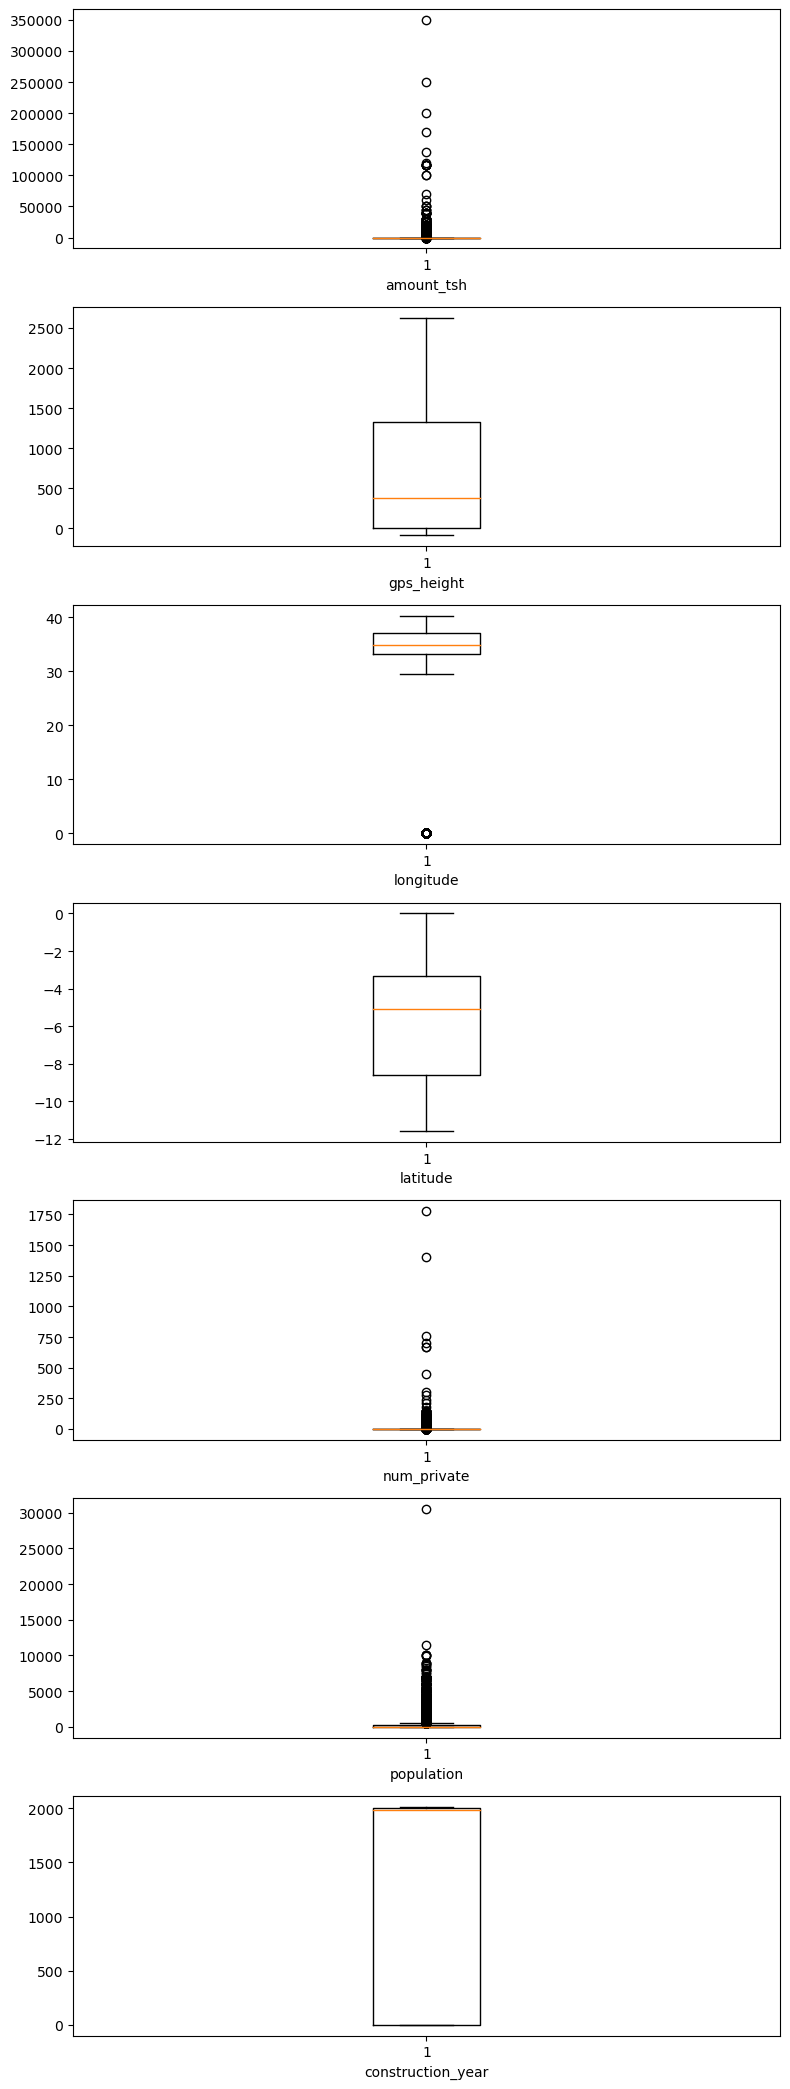

In [24]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for i, column in enumerate(numeric_columns):
    row = i // 4
    col = i % 4
    # Crea el boxplot en el subplot correspondiente
    axes[row, col].boxplot(df[column], vert=True)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('')

plt.tight_layout()
plt.show()

In [25]:
df.amount_tsh.value_counts()

0.0         38426
500.0        2828
50.0         2365
1000.0       1401
20.0         1387
            ...  
53.0            1
6300.0          1
120000.0        1
138000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [26]:
df.population.value_counts()

0       19460
1        6660
200      1841
150      1783
250      1589
        ...  
2314        1
646         1
1942        1
672         1
788         1
Name: population, Length: 1023, dtype: int64

In [27]:
df.gps_height.value_counts()

 0       18529
-15         59
-13         54
-16         51
-20         51
         ...  
 2353        1
 2319        1
 565         1
 643         1
 2366        1
Name: gps_height, Length: 2419, dtype: int64

In [28]:
df.loc[(df.gps_height<0),'gps_height']

30      -41
138     -15
166     -21
169     -16
224     -19
         ..
54898    -3
54940   -20
54947   -37
55035   -19
55040   -18
Name: gps_height, Length: 1454, dtype: int64

In [29]:
df.loc[((df.population==0)|(df.population==1)),'status_group']

4            functional
5            functional
6        non functional
7        non functional
8        non functional
              ...      
55067    non functional
55075    non functional
55076        functional
55080        functional
55081        functional
Name: status_group, Length: 26120, dtype: object

- amount_tsh: Detectamos la presencia de muchos valores iguales a "0". De todas formas consideramos que este dato puede no representar una anomalía y ser un dato correcto ya que es la cantidad de agua que hay en el pozo y por diversas circunstancias este valor puede ser igual a "0".

- gps_height: Nos llamó poderosamente la atención la presencia de valores negativos en esta variable, ya que representa los metros sobre el nivel del mar de cada pozo, es decir su altura. Imputamos los valores negativos a "0".



In [30]:
df["gps_height_imp"] = df["gps_height"].apply(lambda x: x if x >= 0 else 0)

#Eliminamos la columna original para dejar más limpio el df
df = df.drop(columns="gps_height")
df

C:\Users\Javi&Patri\AppData\Local\Temp\ipykernel_11324\4143266312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gps_height_imp"] = df["gps_height"].apply(lambda x: x if x >= 0 else 0)


,amount_tsh,funder,installer,longitude,latitude,wpt_name,num_private,basin,region,population,...,extraction_type,management_group,payment_type,water_quality,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,gps_height_imp
0,6000.0,roman,roman,34.938093,-9.856322,none,0,lake nyasa,iringa,109,...,gravity,user-group,annually,soft,good,enough,groundwater,communal standpipe,functional,1390
1,0.0,grumeti,grumeti,34.698766,-2.147466,zahanati,0,lake victoria,mara,280,...,gravity,user-group,never pay,soft,good,insufficient,surface,communal standpipe,functional,1399
2,25.0,lottery club,world vision,37.460664,-3.821329,kwa mahundi,0,pangani,manyara,250,...,gravity,user-group,per bucket,soft,good,enough,surface,communal standpipe,functional,686
3,0.0,unicef,unicef,38.486161,-11.155298,zahanati ya nanyumbu,0,ruvuma / southern coast,mtwara,58,...,submersible,user-group,never pay,soft,good,dry,groundwater,communal standpipe,non functional,263
4,0.0,action in a,artisan,31.130847,-1.825359,shuleni,0,lake victoria,kagera,0,...,gravity,other,never pay,soft,good,seasonal,surface,communal standpipe,functional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55078,10.0,germany republi,ces,37.169807,-3.253847,area three namba 27,0,pangani,kilimanjaro,125,...,gravity,user-group,per bucket,soft,good,enough,groundwater,communal standpipe,functional,1210
55079,4700.0,cefa-njombe,cefa,35.249991,-9.070629,kwa yahona kuvala,0,rufiji,iringa,56,...,gravity,user-group,annually,soft,good,enough,surface,communal standpipe,functional,1212
55080,0.0,?,?,34.017087,-8.750434,mashine,0,rufiji,mbeya,0,...,swn 80,user-group,monthly,fluoride,fluoride,enough,groundwater,hand pump,functional,0
55081,0.0,malec,musa,35.861315,-6.378573,mshoro,0,rufiji,dodoma,0,...,nira/tanira,user-group,never pay,soft,good,insufficient,groundwater,hand pump,functional,0


In [31]:
df.gps_height_imp.min()

0

#### Según pide el ejercicio 4, buscamos los outliers en "gps_height"

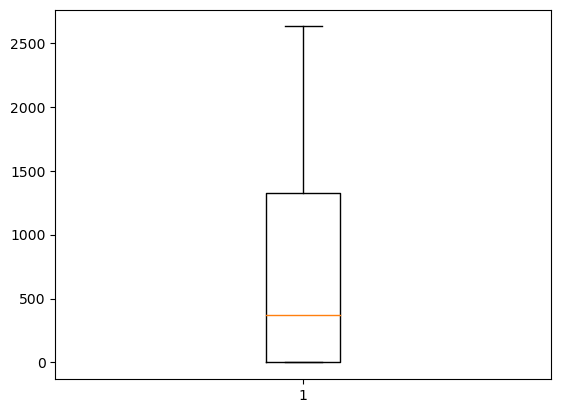

In [32]:
plt.boxplot(df['gps_height_imp'])

plt.show()

No detectamos ningún valor outlier probablemente porque previamente hemos corregido los valores que no tenían sentido (alturas de pozo negativas que estarían por debajo del nivel del mar)

- population: Detectamos muchos valores "0" que pueden ser reales porque correspondan con sitios que se han quedado desiertos, pero los valores "1" nos parecen muy extraños. Sacamos la mediana de la población excluyendo los valores "0" y "1", y se la imputamos a los valores "1"

In [33]:
valores = df.loc[(df.population>1),'population']
mediana_population = valores.median()
df["population_imp"] = df["population"].apply(lambda x: x if x != 1 else mediana_population)

#Eliminamos la columna original para dejar más limpio el df
df = df.drop(columns="population")

print("La mediana de la población es:", mediana_population)

pd.set_option('display.max_columns', None)
df

La mediana de la población es: 200.0


,amount_tsh,funder,installer,longitude,latitude,wpt_name,num_private,basin,region,public_meeting,scheme_management,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quality_group,quantity_group,source_class,waterpoint_type_group,status_group,gps_height_imp,population_imp
0,6000.0,roman,roman,34.938093,-9.856322,none,0,lake nyasa,iringa,true,vwc,false,1999,gravity,user-group,annually,soft,good,enough,groundwater,communal standpipe,functional,1390,109.0
1,0.0,grumeti,grumeti,34.698766,-2.147466,zahanati,0,lake victoria,mara,?,other,true,2010,gravity,user-group,never pay,soft,good,insufficient,surface,communal standpipe,functional,1399,280.0
2,25.0,lottery club,world vision,37.460664,-3.821329,kwa mahundi,0,pangani,manyara,true,vwc,true,2009,gravity,user-group,per bucket,soft,good,enough,surface,communal standpipe,functional,686,250.0
3,0.0,unicef,unicef,38.486161,-11.155298,zahanati ya nanyumbu,0,ruvuma / southern coast,mtwara,true,vwc,true,1986,submersible,user-group,never pay,soft,good,dry,groundwater,communal standpipe,non functional,263,58.0
4,0.0,action in a,artisan,31.130847,-1.825359,shuleni,0,lake victoria,kagera,true,?,true,0,gravity,other,never pay,soft,good,seasonal,surface,communal standpipe,functional,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55078,10.0,germany republi,ces,37.169807,-3.253847,area three namba 27,0,pangani,kilimanjaro,true,water board,true,1999,gravity,user-group,per bucket,soft,good,enough,groundwater,communal standpipe,functional,1210,125.0
55079,4700.0,cefa-njombe,cefa,35.249991,-9.070629,kwa yahona kuvala,0,rufiji,iringa,true,vwc,true,1996,gravity,user-group,annually,soft,good,enough,surface,communal standpipe,functional,1212,56.0
55080,0.0,?,?,34.017087,-8.750434,mashine,0,rufiji,mbeya,true,vwc,false,0,swn 80,user-group,monthly,fluoride,fluoride,enough,groundwater,hand pump,functional,0,0.0
55081,0.0,malec,musa,35.861315,-6.378573,mshoro,0,rufiji,dodoma,true,vwc,true,0,nira/tanira,user-group,never pay,soft,good,insufficient,groundwater,hand pump,functional,0,0.0


In [34]:
df["population_imp"].value_counts()

0.0       19460
200.0      8501
150.0      1783
250.0      1589
300.0      1393
          ...  
1226.0        1
479.0         1
293.0         1
339.0         1
788.0         1
Name: population_imp, Length: 1022, dtype: int64

#### Según pide el ejercicio 4, buscamos los outliers en "population"

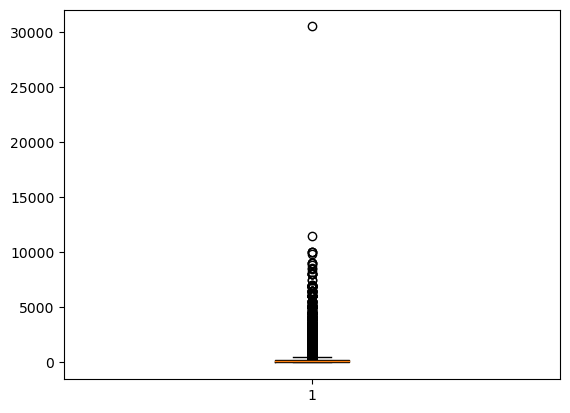

In [35]:
plt.boxplot(df['population_imp'])

plt.show()

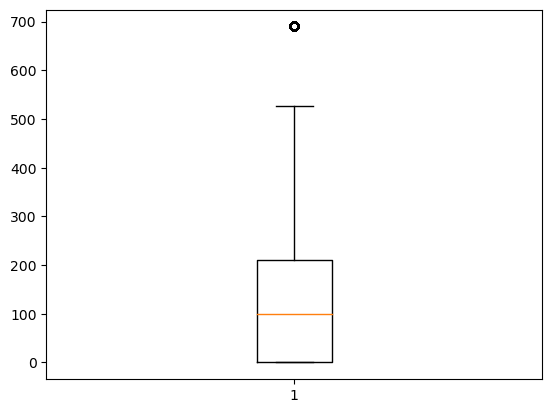

In [36]:
# Cálculo de los percentiles
q1 = np.percentile(df["population_imp"], 25)
q3 = np.percentile(df["population_imp"], 75)
per95 = df['population_imp'].quantile(0.95)
RI = q3 - q1

#Imputamos el percentil 95 a los valores outliers que están por encima
df.loc[df['population_imp'] > q3 + 1.5 * RI , 'population_imp'] = per95

plt.boxplot(df['population_imp'])

plt.show()

- num_private: Nos parece raro que hay una gran cantidad de valores "0" pero no podemos tomar ninguna decisión ya que en el diccionario de variables no tiene descripción.

- construction_year: Vemos que tiene valores igual a "0" y obviamente el año de construcción tiene que tener un dato. Imputamos la moda.

In [37]:
valores = df.loc[(df.construction_year>0),'construction_year']
moda_construction = valores.mode().values[0]

df["construction_year_imp"] = df["construction_year"].apply(lambda x: x if x != 0 else moda_construction)

#Eliminamos la columna original para dejar más limpio el df
df = df.drop(columns="construction_year")

print("La moda del año de construcción es:", moda_construction)

df["construction_year_imp"].value_counts()

La moda del año de construcción es: 2010


2010    21328
2008     2485
2009     2395
2000     1955
2007     1471
2006     1336
2003     1214
2011     1178
2004     1053
2012     1033
2002     1017
1978      940
1995      939
1999      932
2005      922
1990      895
1998      879
1985      860
1996      763
1980      747
1984      713
1994      695
1982      690
1972      640
1974      633
1992      599
1997      577
1993      574
2001      503
1988      478
1983      467
1986      399
1970      396
1975      396
1976      362
1991      306
1989      302
1987      265
1981      227
1977      192
1979      180
1973      176
2013      175
1971      136
1960       95
1963       79
1968       72
1967       71
1969       56
1964       39
1962       29
1961       18
1965       18
1966       17
Name: construction_year_imp, dtype: int64


En términos generales estas son, en principio, las anomalías que detectamos en el DataSet. De todas maneras, al no tener la suficiente información, consideramos precipitada la idea de tomar cualquier tipo de determinación respecto de ellas. Lo correcto sería  realizar las preguntas pertinentes para tomar las decisiones de forma consensuada.

#### Transformad todas las variables objetos en categóricas o numéricas (se pondrán todas las filas nulas como una categoría más). Esto lo podéis hacer con un bucle, con apply, poniendo una a una las columnas, ...

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54917 entries, 0 to 55082
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             54917 non-null  float64
 1   funder                 54917 non-null  object 
 2   installer              54917 non-null  object 
 3   longitude              54917 non-null  float64
 4   latitude               54917 non-null  float64
 5   wpt_name               54917 non-null  object 
 6   num_private            54917 non-null  int64  
 7   basin                  54917 non-null  object 
 8   region                 54917 non-null  object 
 9   public_meeting         54917 non-null  object 
 10  scheme_management      54917 non-null  object 
 11  permit                 54917 non-null  object 
 12  extraction_type        54917 non-null  object 
 13  management_group       54917 non-null  object 
 14  payment_type           54917 non-null  object 
 15  wa

In [39]:
#Definimos en la variable "status_group", "0" para las bombas que no funcionan y "1" para las que sí funcionan
orden_bombas = {"non functional":0, "functional":1}
df["status_group_imputada"] = df["status_group"]
df["status_group_imputada"].replace(orden_bombas, inplace=True)
df = df.drop(columns= "status_group")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54917 entries, 0 to 55082
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             54917 non-null  float64
 1   funder                 54917 non-null  object 
 2   installer              54917 non-null  object 
 3   longitude              54917 non-null  float64
 4   latitude               54917 non-null  float64
 5   wpt_name               54917 non-null  object 
 6   num_private            54917 non-null  int64  
 7   basin                  54917 non-null  object 
 8   region                 54917 non-null  object 
 9   public_meeting         54917 non-null  object 
 10  scheme_management      54917 non-null  object 
 11  permit                 54917 non-null  object 
 12  extraction_type        54917 non-null  object 
 13  management_group       54917 non-null  object 
 14  payment_type           54917 non-null  object 
 15  wa

In [40]:
#Variables que hay que cambiar de tipo:
#"funder", "installer", "wpt_name", "basin", "region", "public_meeting", "scheme_management", "permit", "extraction_type",
#"management_group", "payment_type", "water_quality", "quality_group", "quantity_group", "source_class", "waterpoint_type_group",

#Primero las cambiamos a tipo Category según dice el enunciado del ejercicio

#Creamos una función para transformar el tipo de la columna
def transformar_columna(df):
    for i in df.columns:
        if df[i].dtype=='object':
            df=df.astype({i:"category"})
    return df

# Aplicar la transformación a todas las columnas del DataFrame
df = transformar_columna(df)

df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 54917 entries, 0 to 55082
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             54917 non-null  float64 
 1   funder                 54917 non-null  category
 2   installer              54917 non-null  category
 3   longitude              54917 non-null  float64 
 4   latitude               54917 non-null  float64 
 5   wpt_name               54917 non-null  category
 6   num_private            54917 non-null  int64   
 7   basin                  54917 non-null  category
 8   region                 54917 non-null  category
 9   public_meeting         54917 non-null  category
 10  scheme_management      54917 non-null  category
 11  permit                 54917 non-null  category
 12  extraction_type        54917 non-null  category
 13  management_group       54917 non-null  category
 14  payment_type           54917 non-null 

In [41]:
#Creamos un dataframe secundario con las variables que vamos a trasformar a Label Encoder
df_label = df[["funder", "installer", "wpt_name", "basin", "region", "public_meeting", "scheme_management", "permit", "extraction_type",
               "management_group", "payment_type", "water_quality", "quality_group", "quantity_group", "source_class", "waterpoint_type_group"]]

#Aplicamos un LabelEncoder para convertir a números la variables category

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for columna in df_label.columns:
    le.fit(df_label[columna])
    df_label[columna+'_imputada'] = le.transform(df[columna])

df_label = df_label.drop(columns=["funder", "installer", "wpt_name", "basin", "region", "public_meeting", "scheme_management", "permit", "extraction_type",
               "management_group", "payment_type", "water_quality", "quality_group", "quantity_group", "source_class", "waterpoint_type_group"])
df_label

C:\Users\Javi&Patri\AppData\Local\Temp\ipykernel_11324\3931688007.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label[columna+'_imputada'] = le.transform(df[columna])
C:\Users\Javi&Patri\AppData\Local\Temp\ipykernel_11324\3931688007.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label[columna+'_imputada'] = le.transform(df[columna])
C:\Users\Javi&Patri\AppData\Local\Temp\ipykernel_11324\3931688007.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,funder_imputada,installer_imputada,wpt_name_imputada,basin_imputada,region_imputada,public_meeting_imputada,scheme_management_imputada,permit_imputada,extraction_type_imputada,management_group_imputada,payment_type_imputada,water_quality_imputada,quality_group_imputada,quantity_group_imputada,source_class_imputada,waterpoint_type_group_imputada
0,1340,1376,30383,1,3,2,8,1,3,4,0,6,2,1,0,1
1,464,520,34809,4,9,0,3,2,3,4,2,6,2,2,1,1
2,814,1857,13733,5,8,2,8,2,3,4,5,6,2,1,1,1
3,1705,1710,34891,7,12,2,8,2,14,4,2,6,2,0,0,1
4,21,102,33246,4,4,2,0,2,3,1,2,6,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55078,432,205,500,5,6,2,10,2,3,4,5,6,2,1,0,1
55079,176,196,22627,6,3,2,8,2,3,4,0,6,2,1,1,1
55080,1,2,26196,6,10,2,8,1,15,4,1,1,1,1,0,3
55081,870,1107,27863,6,2,2,8,2,8,4,2,6,2,2,0,3


In [42]:
#Concatenamos el df con el que estamos trabajando y el df_label que ya tiene las variables category en numéricas

df = pd.concat([df, df_label], axis=1)

#Eliminamos las columnas con las variables antes de imputar

df = df.drop(columns=["funder", "installer", "wpt_name", "basin", "region", "public_meeting", "scheme_management", "permit", "extraction_type",
               "management_group", "payment_type", "water_quality", "quality_group", "quantity_group", "source_class", "waterpoint_type_group"])

#Mostramos el df donde podemos observar que hemos hecho tratamiento en todas las columnas que llevan _imp e _imputada
df

,amount_tsh,longitude,latitude,num_private,gps_height_imp,population_imp,construction_year_imp,status_group_imputada,funder_imputada,installer_imputada,wpt_name_imputada,basin_imputada,region_imputada,public_meeting_imputada,scheme_management_imputada,permit_imputada,extraction_type_imputada,management_group_imputada,payment_type_imputada,water_quality_imputada,quality_group_imputada,quantity_group_imputada,source_class_imputada,waterpoint_type_group_imputada
0,6000.0,34.938093,-9.856322,0,1390,109.0,1999,1,1340,1376,30383,1,3,2,8,1,3,4,0,6,2,1,0,1
1,0.0,34.698766,-2.147466,0,1399,280.0,2010,1,464,520,34809,4,9,0,3,2,3,4,2,6,2,2,1,1
2,25.0,37.460664,-3.821329,0,686,250.0,2009,1,814,1857,13733,5,8,2,8,2,3,4,5,6,2,1,1,1
3,0.0,38.486161,-11.155298,0,263,58.0,1986,0,1705,1710,34891,7,12,2,8,2,14,4,2,6,2,0,0,1
4,0.0,31.130847,-1.825359,0,0,0.0,2010,1,21,102,33246,4,4,2,0,2,3,1,2,6,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55078,10.0,37.169807,-3.253847,0,1210,125.0,1999,1,432,205,500,5,6,2,10,2,3,4,5,6,2,1,0,1
55079,4700.0,35.249991,-9.070629,0,1212,56.0,1996,1,176,196,22627,6,3,2,8,2,3,4,0,6,2,1,1,1
55080,0.0,34.017087,-8.750434,0,0,0.0,2010,1,1,2,26196,6,10,2,8,1,15,4,1,1,1,1,0,3
55081,0.0,35.861315,-6.378573,0,0,0.0,2010,1,870,1107,27863,6,2,2,8,2,8,4,2,6,2,2,0,3


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54917 entries, 0 to 55082
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   amount_tsh                      54917 non-null  float64
 1   longitude                       54917 non-null  float64
 2   latitude                        54917 non-null  float64
 3   num_private                     54917 non-null  int64  
 4   gps_height_imp                  54917 non-null  int64  
 5   population_imp                  54917 non-null  float64
 6   construction_year_imp           54917 non-null  int64  
 7   status_group_imputada           54917 non-null  int64  
 8   funder_imputada                 54917 non-null  int32  
 9   installer_imputada              54917 non-null  int32  
 10  wpt_name_imputada               54917 non-null  int32  
 11  basin_imputada                  54917 non-null  int32  
 12  region_imputada                 

### 2.2. Ejercicio 2

#### Ahora, vamos a entrenar el modelo:

#### • Dividid los datos en variable independiente y target

#### • Dividid el modelo en un conjunto de datos para el test (20%) y otro para el train (80%) y random_state=42

In [44]:
x = df.drop(columns="status_group_imputada").values
y = df["status_group_imputada"].values

#Dividimos el modelo en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 42)

#### • Entrenad varios modelos con los datos de train, validadlo con el test y seleccionad el que mejor resultado obtiene.

Probamos con una REGRESIÓN LOGÍSTICA y evaluamos el resultado:

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


La precisión del modelo es: 0.6262062550866179
El accuracy del test del modelo es: 0.6098871085214858
El accuracy del entrenamiento del modelo es: 0.6121821865112785
El recall del modelo es: 0.8342627013630731
[[1313 3215]
 [1070 5386]]


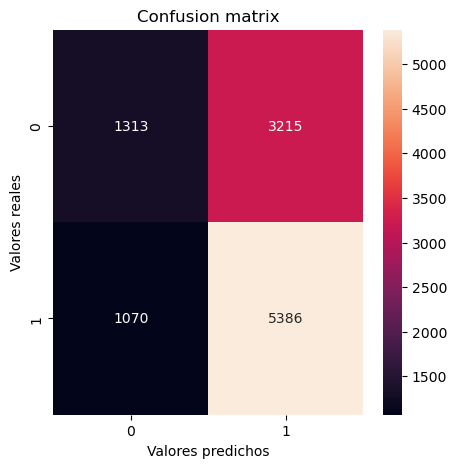

In [45]:
modelo_regresion_logistica = LogisticRegression().fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba de test
pred_regresion_logistica = modelo_regresion_logistica.predict(x_test)

#Realizamos las predicciones con el conjunto de prueba de entrenamiento
pred_regresion_logistica_train = modelo_regresion_logistica.predict(x_train)

#Evaluamos la precisión del modelo
resultado_regresion_logistica = precision_score(y_test, pred_regresion_logistica)
print("La precisión del modelo es:", resultado_regresion_logistica)

#Evaluamos Accuracy con el test
accuracy_regresion_logistica = accuracy_score(y_test, pred_regresion_logistica)
print("El accuracy del test del modelo es:", accuracy_regresion_logistica)

#Evaluamos Accuracy con el train
accuracy_train_regresion_logistica = accuracy_score(y_train, pred_regresion_logistica_train)
print("El accuracy del entrenamiento del modelo es:", accuracy_train_regresion_logistica)

#Evaluamos Recall
recall_regresion_logistica = recall_score(y_test, pred_regresion_logistica)
print("El recall del modelo es:", recall_regresion_logistica)

#Matriz de confusión
matriz_regresion_logistica = confusion_matrix(y_test, pred_regresion_logistica)
print(matriz_regresion_logistica)

#Graficamos la matriz de confusión
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predichos')
    plt.show()
mostrar_resultados(y_test, pred_regresion_logistica)

Probamos con un ÁRBOL DE DECISIÓN y evaluamos el resultado.

Sacamos la profundidad máxima del árbol para decidir por donde cortar y evitar el sobreajuste.

Profundidad: 39
La precisión del modelo es: 0.839073262366938
El accuracy del test del modelo es: 0.8066278222869628
El accuracy del entrenamiento del modelo es: 0.9999772380670566
El recall del modelo es: 0.8302354399008675


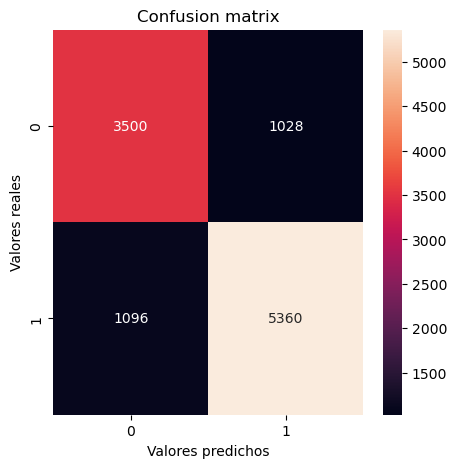

In [46]:
#Definimos el modelo
modelo_arbol_decision = DecisionTreeClassifier().fit(x_train, y_train)

#Sacamos la profundidad máxima para ver por donde vamos a podar
max_depth = modelo_arbol_decision.tree_.max_depth
print("Profundidad:", max_depth) 

#Realizamos las predicciones con el conjunto de prueba
pred_arbol_decision = modelo_arbol_decision.predict(x_test)

#Realizamos las predicciones con el conjunto de prueba de entrenamiento
pred_arbol_decision_train = modelo_arbol_decision.predict(x_train)

#Evaluamos la precisión del modelo
resultado_arbol_decision = precision_score(y_test, pred_arbol_decision)
print("La precisión del modelo es:", resultado_arbol_decision)

#Evaluamos Accuracy con el test
accuracy_arbol_decision = accuracy_score(y_test, pred_arbol_decision)
print("El accuracy del test del modelo es:", accuracy_arbol_decision)

#Evaluamos Accuracy con el train
accuracy_arbol_decision_train = accuracy_score(y_train, pred_arbol_decision_train)
print("El accuracy del entrenamiento del modelo es:", accuracy_arbol_decision_train)

#Evaluamos Recall
recall_arbol_decision = recall_score(y_test, pred_arbol_decision)
print("El recall del modelo es:", recall_arbol_decision)

#Graficamos la matriz de confusión
mostrar_resultados(y_test, pred_arbol_decision)

Probamos el árbol con una profundidad de 24:

In [47]:
#Definimos el modelo
modelo_arbol_decision_24 = DecisionTreeClassifier(max_depth=24).fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_arbol_decision_24 = modelo_arbol_decision_24.predict(x_test)

#Realizamos las predicciones con el conjunto de prueba de entrenamiento
pred_arbol_decision_24_train = modelo_arbol_decision_24.predict(x_train)

#Evaluamos Accuracy con el test
accuracy_arbol_decision_24 = accuracy_score(y_test, pred_arbol_decision_24)
print("El accuracy del test del modelo es:", accuracy_arbol_decision_24)

#Evaluamos Accuracy con el train
accuracy_arbol_decision_24_train = accuracy_score(y_train, pred_arbol_decision_24_train)
print("El accuracy del entrenamiento del modelo es:", accuracy_arbol_decision_24_train)


El accuracy del test del modelo es: 0.8132738528769119
El accuracy del entrenamiento del modelo es: 0.9782851159720484


Probamos el árbol con una profundidad de 20:

In [48]:
#Definimos el modelo
modelo_arbol_decision_20 = DecisionTreeClassifier(max_depth=20).fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_arbol_decision_20 = modelo_arbol_decision_20.predict(x_test)

#Realizamos las predicciones con el conjunto de prueba de entrenamiento
pred_arbol_decision_20_train = modelo_arbol_decision_20.predict(x_train)

#Evaluamos Accuracy con el test
accuracy_arbol_decision_20 = accuracy_score(y_test, pred_arbol_decision_20)
print("El accuracy del test del modelo es:", accuracy_arbol_decision_20)

#Evaluamos Accuracy con el train
accuracy_arbol_decision_20_train = accuracy_score(y_train, pred_arbol_decision_20_train)
print("El accuracy del entrenamiento del modelo es:", accuracy_arbol_decision_20_train)

El accuracy del test del modelo es: 0.8156409322651129
El accuracy del entrenamiento del modelo es: 0.945917647326611


Probamos el árbol con una profundidad de 8:

In [49]:
#Definimos el modelo
modelo_arbol_decision_8 = DecisionTreeClassifier(max_depth=8).fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_arbol_decision_8 = modelo_arbol_decision_8.predict(x_test)

#Realizamos las predicciones con el conjunto de prueba de entrenamiento
pred_arbol_decision_8_train = modelo_arbol_decision_8.predict(x_train)

#Evaluamos Accuracy con el test
accuracy_arbol_decision_8 = accuracy_score(y_test, pred_arbol_decision_8)
print("El accuracy del test del modelo es:", accuracy_arbol_decision_8)

#Evaluamos Accuracy con el train
accuracy_arbol_decision_8_train = accuracy_score(y_train, pred_arbol_decision_8_train)
print("El accuracy del entrenamiento del modelo es:", accuracy_arbol_decision_8_train)

El accuracy del test del modelo es: 0.7826839038601602
El accuracy del entrenamiento del modelo es: 0.7884505952245464


Concluimos que el Árbol de decisión no es el mejor ya que todavía no hemos hecho una selección de variables.

Sin embargo decidimos que lo mejor sería una profundidad de 8 ya que la eficacia no varía mucho y evitamos mucho sobreajuste.

Probamos con un RANDOM FOREST y evaluamos el resultado:

La precisión del modelo es: 0.8562408223201174
El accuracy del test del modelo es: 0.8539694100509833
El accuracy del entrenamiento del modelo es: 0.99993171420117
El recall del modelo es: 0.9031908302354399


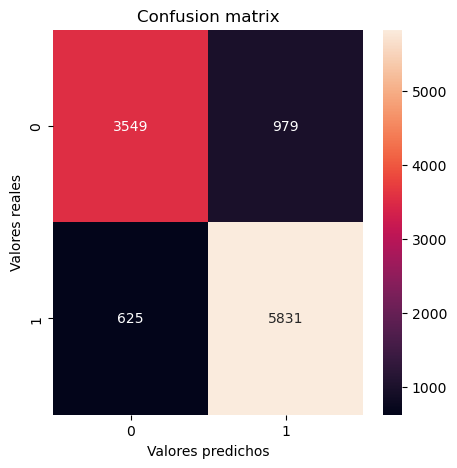

In [50]:
#Definimos el modelo
modelo_random_forest = RandomForestClassifier().fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_random_forest = modelo_random_forest.predict(x_test)

#Realizamos las predicciones con el conjunto de prueba de entrenamiento
pred_random_forest_train = modelo_random_forest.predict(x_train)

#Evaluamos la precisión del modelo
resultado_random_forest = precision_score(y_test, pred_random_forest)
print("La precisión del modelo es:", resultado_random_forest)

#Evaluamos Accuracy con el test
accuracy_random_forest = accuracy_score(y_test, pred_random_forest)
print("El accuracy del test del modelo es:", accuracy_random_forest)

#Evaluamos Accuracy con el train
accuracy_random_forest_train = accuracy_score(y_train, pred_random_forest_train)
print("El accuracy del entrenamiento del modelo es:", accuracy_random_forest_train)

#Evaluamos Recall
recall_random_forest = recall_score(y_test, pred_random_forest)
print("El recall del modelo es:", recall_random_forest)

#Graficamos la matriz de confusión
mostrar_resultados(y_test, pred_random_forest)

Probamos Random Forest con una profundidad de 8 que es la que hemos decidido antes y 10 árboles:

In [51]:
#Definimos el modelo
modelo_random_forest_8 = RandomForestClassifier(n_estimators = 10, max_depth=8).fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_random_forest_8 = modelo_random_forest_8.predict(x_test)

#Realizamos las predicciones con el conjunto de prueba de entrenamiento
pred_random_forest_8_train = modelo_random_forest_8.predict(x_train)

#Evaluamos Accuracy con el test
accuracy_random_forest_8 = accuracy_score(y_test, pred_random_forest_8)
print("El accuracy con el test del modelo es:", accuracy_random_forest_8)

#Evaluamos Accuracy con el train
accuracy_random_forest_8_train = accuracy_score(y_train, pred_random_forest_8_train)
print("El accuracy del entrenamiento del modelo es:", accuracy_random_forest_8_train)

El accuracy con el test del modelo es: 0.7892388929351785
El accuracy del entrenamiento del modelo es: 0.7908633601165411


Después de probar Regresión Logística, Árbol de decisión y Random Forest, decidimos que el mejor modelo que no esté sobreajustado es Random Forest con profundidad 8 y 10 árboles.

#### Una vez hecho esto, responded a las siguientes preguntas:
#### • ¿Qué score da el de entrenamiento y con el test?
#### • ¿Creéis que puede tener sobreajuste (overfitting) o infraajuste (underfitting)?

Al comparar en todos los modelos el accuracy con el test y con el train vemos que cuanta menos profundidad menos sobreajustado está el modelo.

Creemos que todos los modelos pueden tener sobreajuste porque no hemos hecho ninguna selección de variables.
Tanto en el Árbol de decisión como en el Random Forest hemos intentado reducir un poco el sobreajuste limitando la profundidad, aunque como vamos arrastrando el problema de las variables no solucionamos mucho.

### 2.3. Ejercicio 3
#### Seleccionad las 21 variables que más influyen en la predicción y entrenad de nuevo el modelo. ¿Mejora?
#### Usadlas para sacar los scoring ['accuracy', 'precision', 'recall'] del conjunto de train:
#### • ¿Interpreta accuracy?
#### • ¿Interpreta precision?
#### • ¿Interpreta recall?
#### • ¿Predice mejor los positivos o los negativos?

Probamos con dos métodos de selección de variables para ver la importancia respecto al target

In [52]:
#FEATURE IMPORTANCE MUESTRA IMPORTANCIA DE LAS VARIABLES

x2 = df.drop(['status_group_imputada'], axis=1)
y2 = df['status_group_imputada']

feature = ExtraTreesClassifier().fit(x2, y2)
importance_table = pd.DataFrame({'Variable': x2.columns, 'Importancia': feature.feature_importances_})

importance_table_sorted = importance_table.sort_values(by='Importancia', ascending=False)
print(importance_table_sorted)

                          Variable  Importancia
20         quantity_group_imputada     0.138309
2                         latitude     0.099719
1                        longitude     0.098318
22  waterpoint_type_group_imputada     0.084786
9                wpt_name_imputada     0.070088
4                   gps_height_imp     0.059191
6            construction_year_imp     0.057009
15        extraction_type_imputada     0.045562
7                  funder_imputada     0.042826
17           payment_type_imputada     0.042419
8               installer_imputada     0.037945
5                   population_imp     0.036804
11                 region_imputada     0.026997
10                  basin_imputada     0.024783
13      scheme_management_imputada     0.023947
0                       amount_tsh     0.018982
14                 permit_imputada     0.017942
19          quality_group_imputada     0.016459
21           source_class_imputada     0.014473
16       management_group_imputada     0

In [53]:
#FEATURE IMPORTANCE MUESTRA IMPORTANCIA DE LAS VARIABLES

x2 = df.drop(['status_group_imputada'], axis=1)
y2 = df['status_group_imputada']

feature2 = modelo_random_forest_8
importance_table2 = pd.DataFrame({'Variable': x2.columns, 'Importancia': feature2.feature_importances_})

importance_table_sorted2 = importance_table2.sort_values(by='Importancia', ascending=False)
print(importance_table_sorted2)

                          Variable  Importancia
20         quantity_group_imputada     0.328737
22  waterpoint_type_group_imputada     0.206922
0                       amount_tsh     0.083742
6            construction_year_imp     0.063320
15        extraction_type_imputada     0.062751
17           payment_type_imputada     0.031043
1                        longitude     0.030292
13      scheme_management_imputada     0.028321
2                         latitude     0.024357
11                 region_imputada     0.018721
4                   gps_height_imp     0.017948
7                  funder_imputada     0.016585
5                   population_imp     0.015542
8               installer_imputada     0.014872
19          quality_group_imputada     0.013302
10                  basin_imputada     0.010069
18          water_quality_imputada     0.008946
16       management_group_imputada     0.006270
21           source_class_imputada     0.006079
14                 permit_imputada     0

Buscamos la correlación entre variables para descartar colinealidad

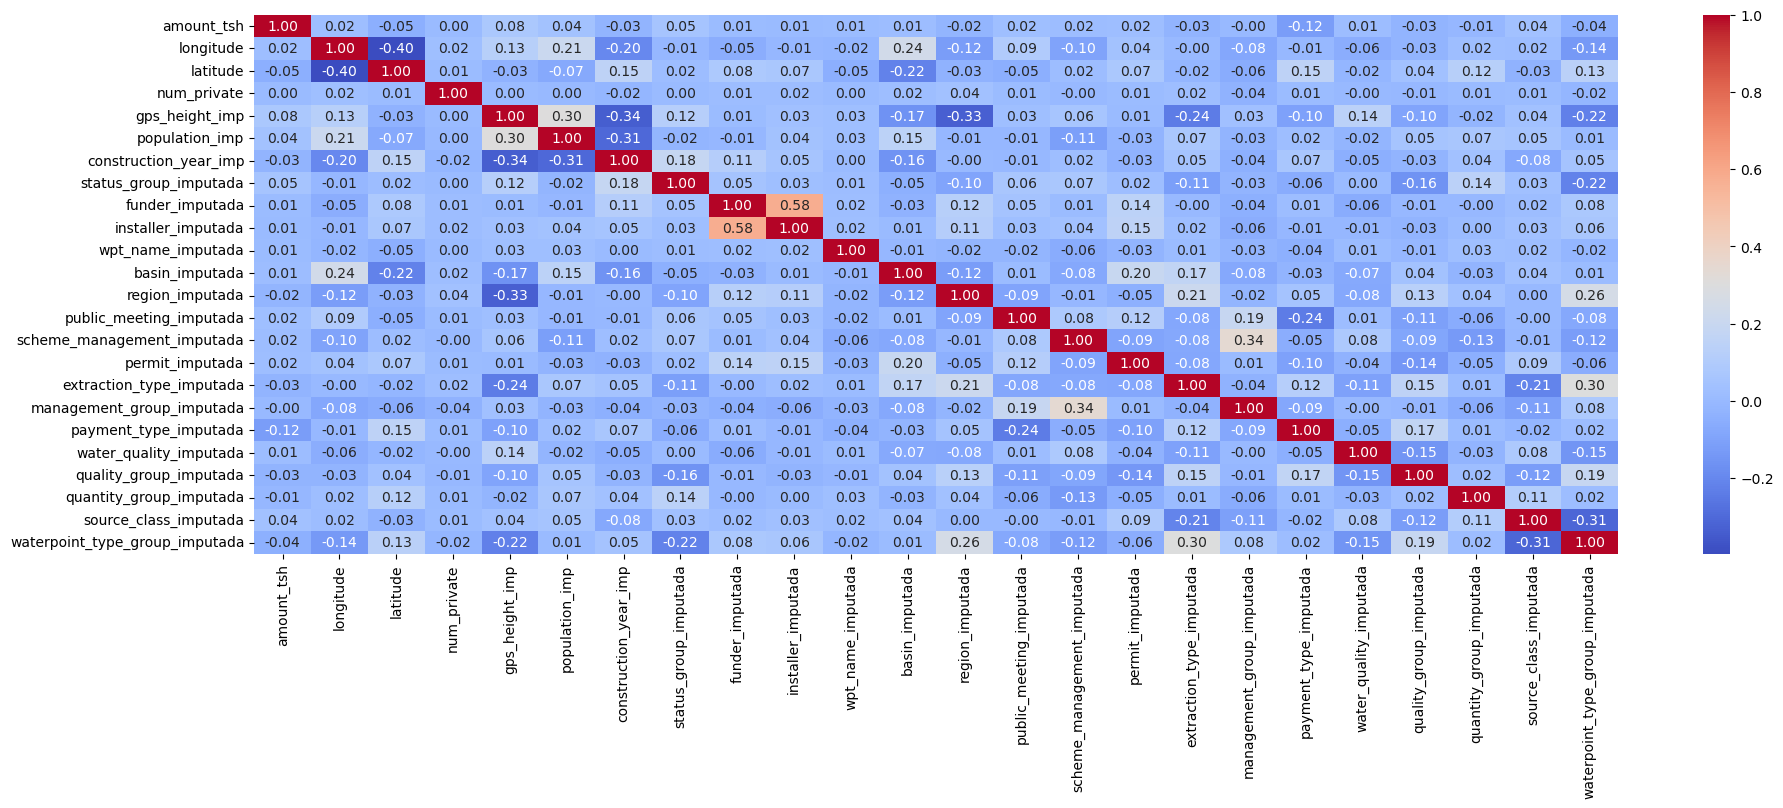

In [54]:
#Sacamos la matriz de correlación de Pearson para ver relación entre variables

pearson = df.corr(method="pearson")

# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(22, 7))

# Generar el mapa de calor
sns.heatmap(pearson, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

plt.show()

Decidimos eliminar "installer_imputada" y "management_group_imputada" porque no tienen una gran importancia con el target y tienen correlación con "funder_imputada" y con "scheme_management_imputada" respectivamente

In [55]:
df_final = df.drop(columns=["installer_imputada", "management_group_imputada"])

Ahora con nuestra selección de 21 variables probamos la Regresión Logística, el Árbol de decisión con profundidad 8 y el Random Forest con profundidad 8

Dividimos el nuevo df en entrenamiento y test

In [56]:
x = df_final.drop(columns="status_group_imputada").values
y = df_final["status_group_imputada"].values

#Dividimos el modelo en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 42)

REGRESIÓN LOGÍSTICA

La precisión del modelo es: 0.6620636747219025
El accuracy del modelo es: 0.6430262199563
El recall del modelo es: 0.8020446096654275
[[1885 2643]
 [1278 5178]]


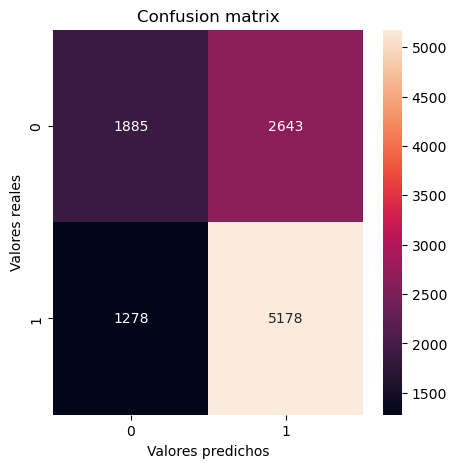

In [57]:
modelo_regresion_logistica = LogisticRegression(max_iter=5000).fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_regresion_logistica = modelo_regresion_logistica.predict(x_test)

#Evaluamos la precisión del modelo
resultado_regresion_logistica = precision_score(y_test, pred_regresion_logistica)
print("La precisión del modelo es:", resultado_regresion_logistica)

#Evaluamos Accuracy
accuracy_regresion_logistica = accuracy_score(y_test, pred_regresion_logistica)
print("El accuracy del modelo es:", accuracy_regresion_logistica)

#Evaluamos Recall
recall_regresion_logistica = recall_score(y_test, pred_regresion_logistica)
print("El recall del modelo es:", recall_regresion_logistica)

#Matriz de confusión
matriz_regresion_logistica = confusion_matrix(y_test, pred_regresion_logistica)
print(matriz_regresion_logistica)

#Graficamos la matriz de confusión
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predichos')
    plt.show()
mostrar_resultados(y_test, pred_regresion_logistica)

Definimos las bombas funcionales con el valor 1 y las no funcionales con 0. Esto nos permite saber que cuando las metricas toman el valor 0 corresponden a los negativos y 1 a los positivos.

- La precisión es de un 66 % y esto indica la cantidad de aciertos de bombas funcionales con respecto a las pedicciones positivas totales.

- El accuracy es de un 64 % y esto indica el porcentaje de registros correctamente clasificados.

- En este caso el recall nos indica que nuestro modelo tiene la capacidad de detectar 80% de las bombas funcionales correctamente respecto del total de bombas funcionales.

- La matriz de confusión nos ayuda a entender los porcentajes entregados por cada métrica.

En resumen, el modelo tiene una mayor capacidad para identificar correctamente los resultados positivos en comparación con los negativos. Aunque puede haber algunos falsos positivos, en general el modelo logra capturar la mayoría de los resultados positivos (80% de recall) mientras mantiene una precisión del 66% en las predicciones positivas.

ÁRBOL PROFUNDIDAD 8

La precisión del modelo es: 0.7562019896738446
El accuracy del modelo es: 0.7826839038601602
El recall del modelo es: 0.9301425030978935


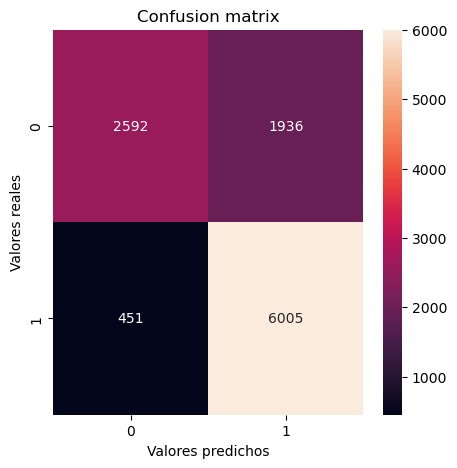

In [58]:
#Definimos el modelo
modelo_arbol_decision_8 = DecisionTreeClassifier(max_depth=8).fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_arbol_decision_8 = modelo_arbol_decision_8.predict(x_test)

#Evaluamos la precisión del modelo
resultado_arbol_decision_8 = precision_score(y_test, pred_arbol_decision_8)
print("La precisión del modelo es:", resultado_arbol_decision_8)

#Evaluamos Accuracy
accuracy_arbol_decision_8 = accuracy_score(y_test, pred_arbol_decision_8)
print("El accuracy del modelo es:", accuracy_arbol_decision_8)

#Evaluamos Recall
recall_arbol_decision_8 = recall_score(y_test, pred_arbol_decision_8)
print("El recall del modelo es:", recall_arbol_decision_8)

#Graficamos la matriz de confusión
mostrar_resultados(y_test, pred_arbol_decision_8)

- La precisión es de un 75.6% y esto indica la cantidad de aciertos de bombas funcionales con respecto a las pedicciones positivas totales.

- El accuracy es de un 78.2% y esto indica el porcentaje de registros correctamente clasificados.

- En este caso el recall nos indica que nuestro modelo tiene la capacidad de detectar 93% de las bombas funcionales correctamente respecto del total de bombas funcionales.

- La matriz de confusión nos ayuda a entender los porcentajes entregados por cada métrica.

En resumen, el modelo tiene una mayor capacidad para identificar correctamente los resultados positivos en comparación con los negativos. Aunque puede haber algunos falsos positivos, en general el modelo logra capturar la mayoría de los resultados positivos (93% de recall) mientras mantiene una precisión del 75.6% en las predicciones positivas.

RANDOM FOREST PROFUNDIDAD 8

La precisión del modelo es: 0.7480952956826702
El accuracy del modelo es: 0.7857793153678078
El recall del modelo es: 0.95817843866171


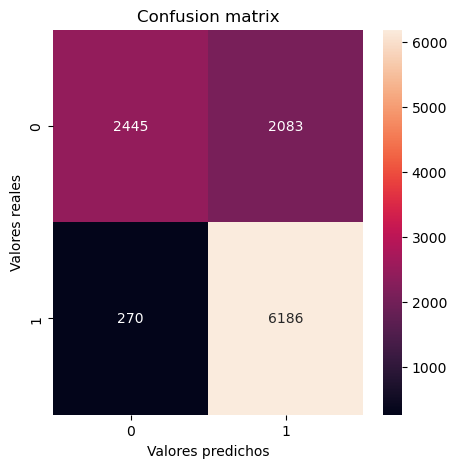

In [59]:
#Definimos el modelo
modelo_random_forest_8 = RandomForestClassifier(n_estimators = 10, max_depth=8).fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_random_forest_8 = modelo_random_forest_8.predict(x_test)

#Evaluamos la precisión del modelo
resultado_random_forest_8 = precision_score(y_test, pred_random_forest_8)
print("La precisión del modelo es:", resultado_random_forest_8)

#Evaluamos Accuracy
accuracy_random_forest_8 = accuracy_score(y_test, pred_random_forest_8)
print("El accuracy del modelo es:", accuracy_random_forest_8)

#Evaluamos Recall
recall_random_forest_8 = recall_score(y_test, pred_random_forest_8)
print("El recall del modelo es:", recall_random_forest_8)

#Graficamos la matriz de confusión
mostrar_resultados(y_test, pred_random_forest_8)

- La precisión es de un 74.8% y esto indica la cantidad de aciertos de bombas funcionales con respecto a las pedicciones positivas totales.

- El accuracy es de un 78.5% y esto indica el porcentaje de registros correctamente clasificados.

- En este caso el recall nos indica que nuestro modelo tiene la capacidad de detectar 95.8% de las bombas funcionales correctamente respecto del total de bombas funcionales.

- La matriz de confusión nos ayuda a entender los porcentajes entregados por cada métrica.

En resumen, el modelo tiene una mayor capacidad para identificar correctamente los resultados positivos en comparación con los negativos. Aunque puede haber algunos falsos positivos, en general el modelo logra capturar la mayoría de los resultados positivos (95.8% de recall) mientras mantiene una precisión del 74.8% en las predicciones positivas.

Podemos concluir que los modelos han mejorado un poco y estarán menos sobreajustados pero tampoco una gran diferencia en cuanto a predicción.


### 2.4. Ejercicio 4

#### Validad la correlación con uno o más gráficos con las columnas ['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'num_private', 'basin','status_group'].

In [60]:
df_ejercicio_4 = df[['amount_tsh', 'funder_imputada', 'gps_height_imp', 'installer_imputada', 'longitude', 'latitude', 'num_private', 'basin_imputada','status_group_imputada']]

df_ejercicio_4



,amount_tsh,funder_imputada,gps_height_imp,installer_imputada,longitude,latitude,num_private,basin_imputada,status_group_imputada
0,6000.0,1340,1390,1376,34.938093,-9.856322,0,1,1
1,0.0,464,1399,520,34.698766,-2.147466,0,4,1
2,25.0,814,686,1857,37.460664,-3.821329,0,5,1
3,0.0,1705,263,1710,38.486161,-11.155298,0,7,0
4,0.0,21,0,102,31.130847,-1.825359,0,4,1
...,...,...,...,...,...,...,...,...,...
55078,10.0,432,1210,205,37.169807,-3.253847,0,5,1
55079,4700.0,176,1212,196,35.249991,-9.070629,0,6,1
55080,0.0,1,0,2,34.017087,-8.750434,0,6,1
55081,0.0,870,0,1107,35.861315,-6.378573,0,6,1


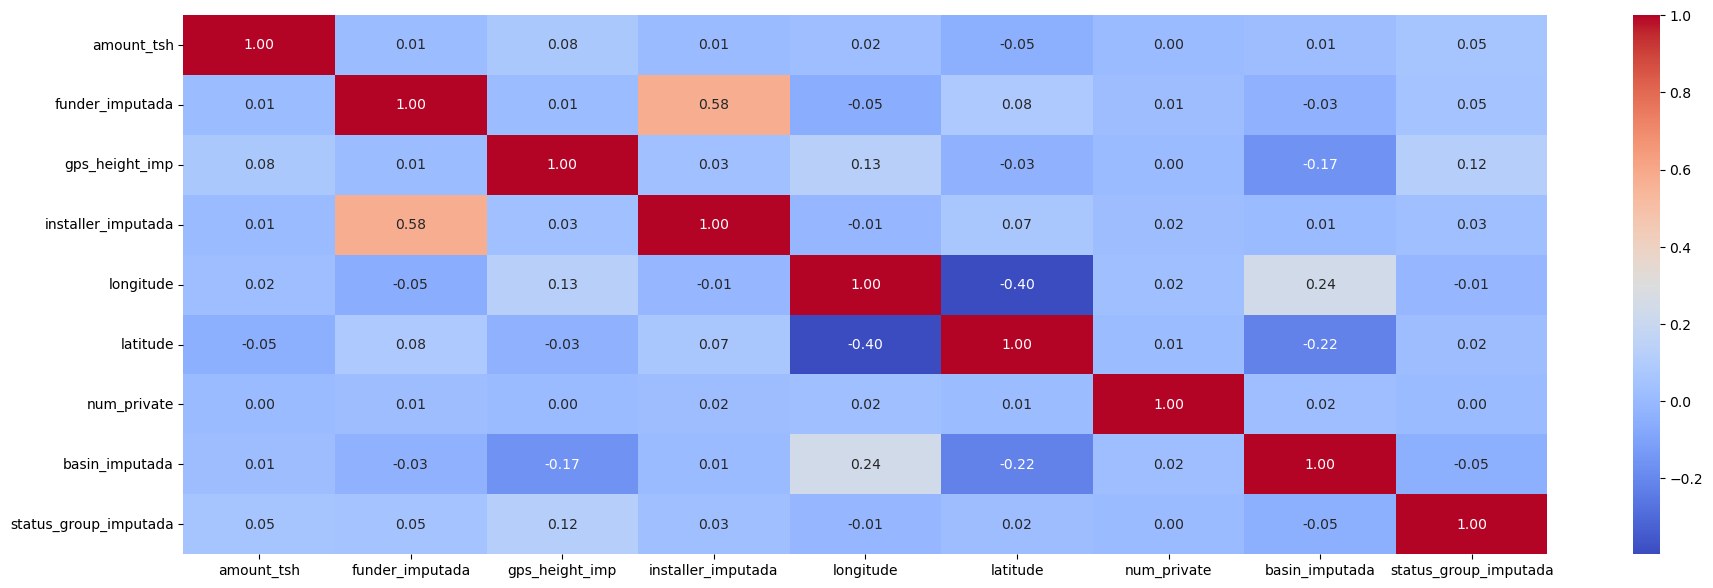

In [61]:
#Sacamos la matriz de correlación de Pearson para ver relación entre variables

pearson = df_ejercicio_4.corr(method="pearson")

# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(22, 7))

# Generar el mapa de calor
sns.heatmap(pearson, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

plt.show()

In [62]:
X = df_ejercicio_4.drop(['status_group_imputada'], axis=1)
y = df_ejercicio_4['status_group_imputada']
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

            variables        VIF
0               const  38.182804
1          amount_tsh   1.008953
2     funder_imputada   1.514048
3      gps_height_imp   1.068311
4  installer_imputada   1.513157
5           longitude   1.257935
6            latitude   1.219219
7         num_private   1.001594
8      basin_imputada   1.131157


#### Después, haced un gráfico, el que consideréis adecuado, para detectar outliers en population y gps_height ¿alguno tiene outliers? De ser así, eliminadlos con el método de Inter cuartil con la columna o columnas con datos atípicos. ¿El modelo ha mejorado? Recordad que hay que volver a sacar los valores x e y (test y train).

Como decidimos tratar los outliers desde el principio, no generamos modelos diferentes en cuanto a las variables population y gps_height

#### Para terminar, usad la búsqueda de hiperparámetro para ajustar al modelo seleccionado (buscad en https://scikit-learn.org/ o en la página del modelo usado).

Finalmente decidimos probar un modelo con menos variables para intentar conseguir un buen resultado con el menor de los sobreajustes, esto lo convertirá en un modelo que se podrá usar durante más tiempo ya que valdrá para diferentes circunstancias.

En este modelo usamos la búsqueda del mejor hiperparámetro.

In [63]:
#Atendiendo a la importancia de variables que tenemos a continuación,decidimos quedarnos con las 6 primeras.
"""
20         quantity_group_imputada     0.401684
22  waterpoint_type_group_imputada     0.174342
0                       amount_tsh     0.072169
6            construction_year_imp     0.062822
15        extraction_type_imputada     0.044220
11                 region_imputada     0.028760
1                        longitude     0.028016
13      scheme_management_imputada     0.027102
2                         latitude     0.023880
17           payment_type_imputada     0.020581
5                   population_imp     0.019081
4                   gps_height_imp     0.018931
7                  funder_imputada     0.016050
18          water_quality_imputada     0.013348
10                  basin_imputada     0.012090
8               installer_imputada     0.011180
16       management_group_imputada     0.007015
9                wpt_name_imputada     0.004407
19          quality_group_imputada     0.003540
14                 permit_imputada     0.003335
12         public_meeting_imputada     0.003229
21           source_class_imputada     0.003183
3                      num_private     0.001034
"""

df_grupal = df[["quantity_group_imputada", "waterpoint_type_group_imputada", "amount_tsh", "construction_year_imp",
                "extraction_type_imputada", "region_imputada", "status_group_imputada"]]

x = df_grupal.drop(columns="status_group_imputada").values
y = df_grupal["status_group_imputada"].values

#Dividimos el modelo en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 42)



df_grupal

,quantity_group_imputada,waterpoint_type_group_imputada,amount_tsh,construction_year_imp,extraction_type_imputada,region_imputada,status_group_imputada
0,1,1,6000.0,1999,3,3,1
1,2,1,0.0,2010,3,9,1
2,1,1,25.0,2009,3,8,1
3,0,1,0.0,1986,14,12,0
4,3,1,0.0,2010,3,4,1
...,...,...,...,...,...,...,...
55078,1,1,10.0,1999,3,6,1
55079,1,1,4700.0,1996,3,3,1
55080,1,3,0.0,2010,15,10,1
55081,2,3,0.0,2010,8,2,1


Utilizamos el método GridSearch para ver que hiperparámetros propone:

Puntuación del modelo: 0.8607170821421418
Mejor puntuación: 0.817196812938542
Configuración: {'criterion': 'entropy', 'max_depth': 24}
La precisión del modelo es: 0.8158421504146411
El accuracy del modelo es: 0.8144573925710124
El recall del modelo es: 0.8838289962825279
Profundidad: 39


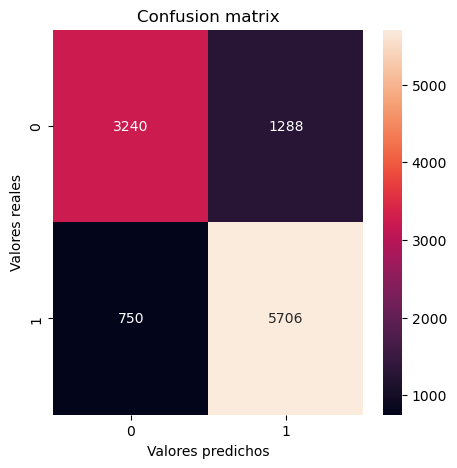

In [64]:
#Definimos el modelo
modelo_grupal_random_forest = RandomForestClassifier().fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_random_forest_grupal = modelo_grupal_random_forest.predict(x_test)

#Configuramos las parametrizaciones
param_grid = {"max_depth":[2, 4, 8, 12, 24, 39], "criterion":["gini","entropy"]}

#Entrenamos el modelo con la configuración
rsearch = GridSearchCV (estimator=modelo_grupal_random_forest, param_grid=param_grid)
rsearch.fit(x,y)

#Vemos la puntuación del modelo, la mejor puntuación y configuración
print("Puntuación del modelo:", rsearch.score(x,y))
print("Mejor puntuación:", rsearch.best_score_)
print("Configuración:", rsearch.best_params_)

#Evaluamos la precisión del modelo
resultado_random_forest_grupal = precision_score(y_test, pred_random_forest_grupal)
print("La precisión del modelo es:", resultado_random_forest_grupal)

#Evaluamos Accuracy
accuracy_random_forest_grupal = accuracy_score(y_test, pred_random_forest_grupal)
print("El accuracy del modelo es:", accuracy_random_forest_grupal)

#Evaluamos Recall
recall_random_forest_grupal = recall_score(y_test, pred_random_forest_grupal)
print("El recall del modelo es:", recall_random_forest_grupal)

#Sacamos la profundidad máxima para ver por donde vamos a podar
profundidad_maxima = max([estimator.tree_.max_depth for estimator in modelo_grupal_random_forest.estimators_])
print("Profundidad:", max_depth)

#Graficamos la matriz de confusión
mostrar_resultados(y_test, pred_random_forest_grupal)

El resultado es {'criterion': 'gini', 'max_depth': 24}

Utilizamos el método RandomizedSearchCV para ver que hiperparámetros propone:

Puntuación del modelo: 0.860771710035144
Mejor puntuación: 0.8173607208226658
Configuración: {'max_depth': 39, 'criterion': 'entropy'}
La precisión del modelo es: 0.8164375715922108
El accuracy del modelo es: 0.814639475600874
El recall del modelo es: 0.8832094175960347
Profundidad: 39


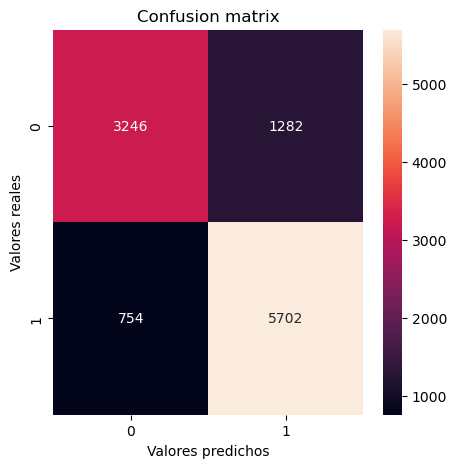

In [65]:
#Definimos el modelo
modelo_grupal_random_forest = RandomForestClassifier().fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_random_forest_grupal = modelo_grupal_random_forest.predict(x_test)

#Entrenamos el modelo con la configuración
rsearch = RandomizedSearchCV (modelo_grupal_random_forest, param_grid)
rsearch.fit(x,y)

#Vemos la puntuación del modelo, la mejor puntuación y configuración
print("Puntuación del modelo:", rsearch.score(x,y))
print("Mejor puntuación:", rsearch.best_score_)
print("Configuración:", rsearch.best_params_)

#Evaluamos la precisión del modelo
resultado_random_forest_grupal = precision_score(y_test, pred_random_forest_grupal)
print("La precisión del modelo es:", resultado_random_forest_grupal)

#Evaluamos Accuracy
accuracy_random_forest_grupal = accuracy_score(y_test, pred_random_forest_grupal)
print("El accuracy del modelo es:", accuracy_random_forest_grupal)

#Evaluamos Recall
recall_random_forest_grupal = recall_score(y_test, pred_random_forest_grupal)
print("El recall del modelo es:", recall_random_forest_grupal)

#Sacamos la profundidad máxima para ver por donde vamos a podar
profundidad_maxima = max([estimator.tree_.max_depth for estimator in modelo_grupal_random_forest.estimators_])
print("Profundidad:", max_depth)

#Graficamos la matriz de confusión
mostrar_resultados(y_test, pred_random_forest_grupal)

El resultado es: {'max_depth': 39, 'criterion': 'entropy'}

No nos convencen los resultados que nos dan estos algoritmos automáticos  y decidimos probar manualmente nosotros:

La precisión del modelo es: 0.7827173484150993
El accuracy del test del modelo es: 0.8036234522942461
El accuracy del entrenamiento del modelo es: 0.8172216784649352
El recall del modelo es: 0.9217781908302355


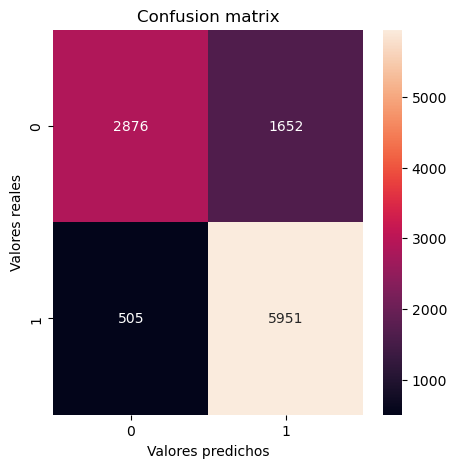

In [66]:
#Definimos el modelo
modelo_grupal_random_forest = RandomForestClassifier(n_estimators = 5, max_depth=12).fit(x_train, y_train)

#Realizamos las predicciones con el conjunto de prueba
pred_random_forest_grupal = modelo_grupal_random_forest.predict(x_test)

#Realizamos las predicciones con el conjunto de prueba de entrenamiento
pred_random_forest_grupal_train = modelo_grupal_random_forest.predict(x_train)

#Evaluamos la precisión del modelo
resultado_random_forest_grupal = precision_score(y_test, pred_random_forest_grupal)
print("La precisión del modelo es:", resultado_random_forest_grupal)

#Evaluamos Accuracy con el test
accuracy_random_forest_grupal = accuracy_score(y_test, pred_random_forest_grupal)
print("El accuracy del test del modelo es:", accuracy_random_forest_grupal)

#Evaluamos Accuracy con el train
accuracy_random_forest_grupal_train = accuracy_score(y_train, pred_random_forest_grupal_train)
print("El accuracy del entrenamiento del modelo es:", accuracy_random_forest_grupal_train)

#Evaluamos Recall
recall_random_forest_grupal = recall_score(y_test, pred_random_forest_grupal)
print("El recall del modelo es:", recall_random_forest_grupal)

#Graficamos la matriz de confusión
mostrar_resultados(y_test, pred_random_forest_grupal)

Vemos que a mayor profundidad obtenemos un mejor Accuracy y una mejor precisión pero sacrificamos sensibilidad, y al contrario a menor profundidad tendremos una mejor sensibilidad, además de que conseguimos un menor sobreajuste. 

Finalmente decidimos escoger un Random Forest, con 5 árboles y profundidad 12 porque al sacar las comprobaciones vemos que obtenemos una buena precisión y Accuracy sin restar tanta sensibilidad por lo que nos parece un modelo muy equilibrado.

También hemos hecho la prueba con el train para ver que el modelo no está muy sobreajustado.

Aún así la mejor praxis sería hablar con el cliente para ver cuales son sus prioridades:
- Evitar que bombas no funcionales sean clasificadas como funcionales, entonces atenderíamos a un modelo más preciso.
- Evitar que bombas funcionales no sean identificadas correctamente, entonces atenderíamos a un modelo más sensible.
